# Data Viz 2023: Les-Derniers-Vainqueurs

In [1]:
import os
import gzip
import random
import pickle
import re
import itertools
import collections
import operator
import requests
from urllib.parse import *
from datetime import *
from dateutil.parser import parse

import math
import sklearn
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import *

import ast
import gensim
import string
import nltk
import codecs
import json
import vaderSentiment
import spacy
from empath import Empath
from bs4 import BeautifulSoup

import networkx as nx

from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

data_folder = "./data/"

print("Package import test successful!")

Package import test successful!


#### The data
Our data are retrieved from 
- [Pokemon All Status Data (Gen1 to 9)](https://www.kaggle.com/datasets/takamasakato/pokemon-all-status-data) 
- [Complete Competitive Pokemon Dataset](https://www.kaggle.com/datasets/n2cholas/competitive-pokemon-dataset)
- [The Complete Pokemon Dataset](https://www.kaggle.com/datasets/rounakbanik/pokemon)

The data are pre-downloaded into our ```./data``` folder

#### Loading the data

In [2]:
pokemon_data1_name = "Pokedex_Ver_SV1.csv"
pokemon_data2_name = "pokemon-data.csv"
pokemon_data3_name = "pokemon.csv"
pokemon_move_data_name = "move-data.csv"

# pokemon_data1: Gen1-9 data
# pokemon_data2: competition
# pokemon_data3: Gen1-7 data

pokemon_data1 = pd.read_csv(data_folder + pokemon_data1_name)
pokemon_data2 = pd.read_csv(data_folder + pokemon_data2_name, sep = ";")
pokemon_data3 = pd.read_csv(data_folder + pokemon_data3_name)
pokemon_move_data = pd.read_csv(data_folder + pokemon_move_data_name)

#### Looking at the data
We will now take a glimpse of the data to see what they are like.

In [3]:
pokemon_data1.columns

Index(['No', 'Original_Name', 'Name', 'Generation', 'Height', 'Weight',
       'Type1', 'Type2', 'Ability1', 'Ability2', 'Ability_Hidden', 'Color',
       'Gender_Male', 'Gender_Female', 'Gender_Unknown', 'Egg_Steps',
       'Egg_Group1', 'Egg_Group2', 'Get_Rate', 'Base_Experience',
       'Experience_Type', 'Category', 'Mega_Evolution_Flag', 'Region_Form',
       'HP', 'Attack', 'Defense', 'SP_Attack', 'SP_Defense', 'Speed', 'Total',
       'E_HP', 'E_Attack', 'E_Defense', 'E_SP_Attack', 'E_SP_Defense',
       'E_Speed'],
      dtype='object')

In [4]:
pokemon_data1.head(5)

,No,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,Ability2,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
0,1,Bulbasaur,Bulbasaur,1,0.7m,6.9kg,Grass,Poison,Overgrow,NaN,...,65,65,45,318,0,0,0,1,0,0
1,2,Ivysaur,Ivysaur,1,1.0m,13.0kg,Grass,Poison,Overgrow,NaN,...,80,80,60,405,0,0,0,1,1,0
2,3,Venusaur,Venusaur,1,2.0m,100.0kg,Grass,Poison,Overgrow,NaN,...,100,100,80,525,0,0,0,2,1,0
3,3,Venusaur,Mega Venusaur,1,2.4m,155.5kg,Grass,Poison,Thick Fat,NaN,...,122,120,80,625,0,0,0,2,1,0
4,4,Charmander,Charmander,1,0.6m,8.5kg,Fire,NaN,Blaze,NaN,...,60,50,65,309,0,0,0,0,0,1


In [5]:
pokemon_data2.columns

Index(['Name', 'Types', 'Abilities', 'Tier', 'HP', 'Attack', 'Defense',
       'Special Attack', 'Special Defense', 'Speed', 'Next Evolution(s)',
       'Moves'],
      dtype='object')

In [6]:
pokemon_data2.head(5)

,Name,Types,Abilities,Tier,HP,Attack,Defense,Special Attack,Special Defense,Speed,Next Evolution(s),Moves
0,Abomasnow,"['Grass', 'Ice']","['Snow Warning', 'Soundproof']",PU,90,92,75,92,85,60,[],"['Ice Punch', 'Powder Snow', 'Leer', 'Razor Le..."
1,Abomasnow-Mega,"['Grass', 'Ice']",['Snow Warning'],NUBL,90,132,105,132,105,30,[],"['Ice Punch', 'Powder Snow', 'Leer', 'Razor Le..."
2,Abra,['Psychic'],"['Inner Focus', 'Magic Guard', 'Synchronize']",LC,25,20,15,105,55,90,['Kadabra'],"['Teleport', 'Ally Switch', 'Barrier', 'Encore..."
3,Absol,['Dark'],"['Justified', 'Pressure', 'Super Luck']",PU,65,130,60,75,60,75,[],"['Perish Song', 'Future Sight', 'Me First', 'R..."
4,Absol-Mega,['Dark'],['Magic Bounce'],RUBL,65,150,60,115,60,115,[],"['Perish Song', 'Future Sight', 'Me First', 'R..."


In [7]:
pokemon_move_data.columns

Index(['Index', 'Name', 'Type', 'Category', 'Contest', 'PP', 'Power',
       'Accuracy', 'Generation'],
      dtype='object')

In [8]:
pokemon_move_data.head(5)

,Index,Name,Type,Category,Contest,PP,Power,Accuracy,Generation
0,1,Pound,Normal,Physical,Tough,35,40,100,1
1,2,Karate Chop,Fighting,Physical,Tough,25,50,100,1
2,3,Double Slap,Normal,Physical,Cute,10,15,85,1
3,4,Comet Punch,Normal,Physical,Tough,15,18,85,1
4,5,Mega Punch,Normal,Physical,Tough,20,80,85,1


In [9]:
pokemon_data3.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [10]:
pokemon_data3.head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


There are some missing values in data1, it is by design of the game.

In [11]:
pokemon_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No                   1193 non-null   int64  
 1   Original_Name        1193 non-null   object 
 2   Name                 1193 non-null   object 
 3   Generation           1193 non-null   int64  
 4   Height               1193 non-null   object 
 5   Weight               1193 non-null   object 
 6   Type1                1193 non-null   object 
 7   Type2                655 non-null    object 
 8   Ability1             1193 non-null   object 
 9   Ability2             583 non-null    object 
 10  Ability_Hidden       925 non-null    object 
 11  Color                1193 non-null   object 
 12  Gender_Male          1193 non-null   float64
 13  Gender_Female        1193 non-null   float64
 14  Gender_Unknown       1193 non-null   int64  
 15  Egg_Steps            1193 non-null   i

Some data in ```Tier``` are missing

In [12]:
pokemon_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               918 non-null    object
 1   Types              918 non-null    object
 2   Abilities          918 non-null    object
 3   Tier               820 non-null    object
 4   HP                 918 non-null    int64 
 5   Attack             918 non-null    int64 
 6   Defense            918 non-null    int64 
 7   Special Attack     918 non-null    int64 
 8   Special Defense    918 non-null    int64 
 9   Speed              918 non-null    int64 
 10  Next Evolution(s)  918 non-null    object
 11  Moves              918 non-null    object
dtypes: int64(6), object(6)
memory usage: 86.2+ KB


No missing value in the third (Gen 1-7) data as well.

In [13]:
pokemon_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

#### Proprocessing

We will replace the missing values as 'NO INFO'

Starting from Generation 8, all mega pokemon are removed from the game, so we will remove all mega-pokemons.

In [14]:
def remove_mega(pokemon_data, name):
    pokemon_data['lower_name'] = pokemon_data[name].str.lower()
    pokemon_data['lower_name'] = pokemon_data.lower_name.apply(lambda x: 1 if "mega" in x else 0)
    keep_rows = pokemon_data['lower_name'] != 1
    result = pokemon_data[keep_rows]
    result.drop(columns = ['lower_name'], inplace = True)
    print("removed", len(pokemon_data) - len(result), "rows")
    return result

In [15]:
# replacing missing values in pokemon_data1
pokemon_data1.Type2.fillna(value='NO INFO', inplace=True)
pokemon_data1.Ability2.fillna(value='NO INFO', inplace=True)
pokemon_data1.Ability_Hidden.fillna(value='NO INFO', inplace=True)
pokemon_data1.Egg_Group2.fillna(value='NO INFO', inplace=True)
pokemon_data2.Tier.fillna(value='NO INFO', inplace=True)

# removing mega pokemon
pokemon_data1 = remove_mega(pokemon_data1, 'Name')
pokemon_data2 = remove_mega(pokemon_data2, 'Name')
pokemon_data3 = remove_mega(pokemon_data3, 'name')


removed 50 rows
removed 50 rows
removed 2 rows


Writing cleaned data into the data folder

In [16]:
if not os.path.isfile(data_folder + "pokemon_data1_clean.csv"):
    pokemon_data1.to_csv(data_folder + "pokemon_data1_clean.csv", index=False)
if not os.path.isfile(data_folder + "pokemon_data2_clean.csv"):
    pokemon_data2.to_csv(data_folder + "pokemon_data2_clean.csv", index=False)
if not os.path.isfile(data_folder + "pokemon_data3_clean.csv"):
    pokemon_data3.to_csv(data_folder + "pokemon_data3_clean.csv", index=False)

#### Exploratory data analysis

##### pokemon_data1

In [17]:
pokemon_data1.columns

Index(['No', 'Original_Name', 'Name', 'Generation', 'Height', 'Weight',
       'Type1', 'Type2', 'Ability1', 'Ability2', 'Ability_Hidden', 'Color',
       'Gender_Male', 'Gender_Female', 'Gender_Unknown', 'Egg_Steps',
       'Egg_Group1', 'Egg_Group2', 'Get_Rate', 'Base_Experience',
       'Experience_Type', 'Category', 'Mega_Evolution_Flag', 'Region_Form',
       'HP', 'Attack', 'Defense', 'SP_Attack', 'SP_Defense', 'Speed', 'Total',
       'E_HP', 'E_Attack', 'E_Defense', 'E_SP_Attack', 'E_SP_Defense',
       'E_Speed'],
      dtype='object')

**Converting height data in pokemon_data1 into float numbers and visualizing them.**

In [18]:
pokemon_height = pokemon_data1[["Name", "Height"]]
pokemon_height['Height'] = pokemon_height.Height.apply(lambda x: x.replace("m",""))
pokemon_height = pokemon_height.astype({"Height": float})
pokemon_height = pokemon_height.sort_values(by = "Height", ascending = False)
pokemon_height_top50 = pokemon_height.head(50)
fig = px.bar(pokemon_height_top50, x = "Name", y = "Height", title = "Top 50 Pokemon Height",color='Height', height=600)
fig.show()

**Converting weight data in pokemon_data1 into float numbers and visualizing them.**

In [19]:
pokemon_weight = pokemon_data1[["Name", "Weight"]]
pokemon_weight['Weight'] = pokemon_weight.Weight.apply(lambda x: x.replace("kg",""))
pokemon_weight = pokemon_weight.astype({"Weight": float})
pokemon_weight = pokemon_weight.sort_values(by = "Weight", ascending = False)
pokemon_weight_top50 = pokemon_weight.head(50)
px.bar(pokemon_weight_top50, x = "Name", y = "Weight", title = "Top 50 Pokemon Weight",color='Weight', height=600)

**Plotting average total ability by generation**

In many games that last for years, there is often an issue called "data exploation", which means as newer versions of game comes out, data of the previous generations become relatively weaker. However in pokemon this is not the case.

In [20]:
pokemon_total = pokemon_data1[["Total", "Generation"]]
# mean of total by generation
pokemon_total_mean_by_gen = pokemon_total.groupby("Generation")['Total'].mean().reset_index()
# standard error of total by generation, this is used to plot error bar
# SE = s / sqrt(n), s is standard deviation, n is sample size
pokemon_total_se_by_gen = pokemon_total.groupby('Generation')['Total'].agg(np.std) / np.sqrt(pokemon_total.groupby('Generation')['Total'].count())
px.bar(pokemon_total_mean_by_gen, x = "Generation", y = "Total", error_y = pokemon_total_se_by_gen, title = "Average Total Ability by Generation ",color='Total', height=600)

**Plotting get rate information**

- What is the most hard-to-catch pokemon?
- Is get rate changing among different generations?

In [21]:
pokemon_get_rate = pokemon_data1[['Generation','Name','Get_Rate']]

Starting from Generation 5, we see a stable decreasing get rate.

In [22]:
# mean of total by generation
pokemon_rate_mean_by_gen = pokemon_get_rate.groupby("Generation")['Get_Rate'].mean().reset_index()
# standard error of total by generation, this is used to plot error bar
# SE = s / sqrt(n), s is standard deviation, n is sample size
pokemon_rate_se_by_gen = pokemon_get_rate.groupby('Generation')['Get_Rate'].agg(np.std) / np.sqrt(pokemon_get_rate.groupby('Generation')['Get_Rate'].count())
px.bar(pokemon_rate_mean_by_gen, x = "Generation", y = "Get_Rate", error_y = pokemon_rate_se_by_gen, title = "Average Get Rate by Generation ",color='Get_Rate', height=600)

To further emphasize the effct, we can do a t-test to examine the significance.

We see that Gen5 has a higher get rate than gen 9, however with rather low significance.

In [23]:
pokemon_rate_gen5 = pokemon_get_rate[pokemon_get_rate['Generation'] == 5]
pokemon_rate_gen9 = pokemon_get_rate[pokemon_get_rate['Generation'] == 9]
stats.ttest_ind(pokemon_rate_gen5['Get_Rate'], pokemon_rate_gen9['Get_Rate'])

Ttest_indResult(statistic=1.4836227481546966, pvalue=0.1390258110612133)

We now look at the hardest-to-catch pokemon, and which generation are they from.

In [24]:
pokemon_rate3 = pokemon_get_rate[pokemon_get_rate['Get_Rate'] == 3]
pokemon_rate3_bygen = pokemon_rate3.groupby('Generation')['Name'].count().reset_index()
fig = px.bar(pokemon_rate3_bygen, x = "Generation", y = "Name", title = "Number of Pokemon with Get Rate 3 by Generation ",color='Name', height=600)
fig.update_layout(xaxis_title="Generation", yaxis_title="Number of Pokemon")
fig.show()

**We look at the count of differnt types of pokemon**

In [25]:
fig = px.treemap(pokemon_data1, path=['Type1','Name'],hover_data=['Generation','Type1','Height','Weight'],color='Type1')
fig.update_layout(
    title='Diffrent Type of Pokemon with their Name')
fig.show()

**We look at how pokemon with different abilities are distributed in the space of ability1, 2 and hidden ability**

Data seem to be nicely distributed.

In [203]:
pokemon_data1['Ability_Number'] = 1-((pokemon_data1['Ability1']=="NO INFO").astype(int)) + 1-((pokemon_data1['Ability2']=="NO INFO").astype(int)) + 1-((pokemon_data1['Ability_Hidden']=="NO INFO").astype(int))
pokemon_data1_temp = pokemon_data1.copy()
pokemon_data1_temp[['Ability2','Ability_Hidden']] = pokemon_data1_temp[['Ability2','Ability_Hidden']].fillna(value='NO INFO')
pokemon_ability = pokemon_data1_temp.groupby(['Name','Ability_Number'])['Ability1','Ability2','Ability_Hidden'].sum().reset_index().sort_values(by='Name',ascending=False)

fig = px.scatter_3d(pokemon_ability, x="Ability1", y="Ability2", z="Ability_Hidden", color="Ability_Number", size="Ability_Number", hover_name="Name",
                  symbol="Ability_Number")
fig.update_layout(coloraxis_colorbar=dict(
    title="Ability of Pokemon",
    tickvals=[1,2,3],
    ticktext=["Ability1","Ability2","Ability_Hidden"],
    lenmode="pixels", len=150,
))
fig.update_layout(
    title='Pokemon with Different Type of Ability',
    scene=dict(
        xaxis=dict(showticklabels=False, gridcolor='gray'),  # Hide x-axis labels
        yaxis=dict(showticklabels=False, gridcolor='gray'),  # Hide y-axis labels
        zaxis=dict(showticklabels=False, gridcolor='gray'),  # Hide z-axis labels
    )
)
fig.update_layout(coloraxis_showscale=False)
fig.update_layout(
    title='Pokemon with Different Type of Ability')
fig.show()

In [204]:
# stroing the data in a json file to viz it in our website
import json
import numpy as np

# Convert numpy's ndarray to Python list
def default(o):
    if isinstance(o, np.ndarray):
        return o.tolist()
    raise TypeError

fig_data = fig.to_dict()

# Use the default function to replace ndarray
with open('data/3dplot.json', 'w') as f:
    json.dump(fig_data, f, default=default)


##### pokemon_data2

As we will compute the ***effective power*** of a pokemon, we need the following data:

In [27]:
pokemon_data2_numbers = pokemon_data2[['Name','HP','Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']]
pokemon_data2_numbers.describe()

,HP,Attack,Defense,Special Attack,Special Defense,Speed
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000
mean,69.047235,77.597926,72.746544,71.019585,70.867512,67.084101
std,26.460370,30.686356,29.958646,31.289154,27.558928,28.485429
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,46.000000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,69.000000,65.000000
75%,80.000000,100.000000,90.000000,92.500000,87.000000,90.000000
max,255.000000,181.000000,230.000000,180.000000,230.000000,180.000000


To examine the frequency of usage of a pokemon by players, we can use the data from the competitive dataset:

In [28]:
pokemon_data2.Tier.unique()

array(['PU', 'LC', 'NU', 'Uber', 'RU', 'NO INFO', 'UUBL', 'UU', 'OU',
       'PUBL', 'NUBL', 'RUBL', 'Limbo'], dtype=object)

The abilities of a pokemon is also of interest.

In [29]:
temp = np.append(pokemon_data1.Ability1.unique(),pokemon_data1.Ability2.unique())
temp = np.append(temp,pokemon_data1.Ability_Hidden.unique())
temp = np.unique(temp)
len(temp)

295

In [30]:
pokemon_data2[pokemon_data2['Tier'] == 'OU'].Abilities

20                  ['Effect Spore', 'Regenerator']
65           ['Defiant', 'Inner Focus', 'Pressure']
66                                  ['Beast Boost']
104                                 ['Beast Boost']
106      ['Healer', 'Natural Cure', 'Serene Grace']
128        ['Cute Charm', 'Magic Guard', 'Unaware']
228     ['Mold Breaker', 'Sand Force', 'Sand Rush']
239                  ['Anticipation', 'Iron Barbs']
266                     ['Rough Skin', 'Sand Veil']
311           ['Battle Bond', 'Protean', 'Torrent']
312                                 ['Battle Bond']
332          ['Limber', 'Mold Breaker', 'Unburden']
335                                  ['Flash Fire']
350                                    ['Magician']
369                                ['Serene Grace']
381                                 ['Beast Boost']
383                                   ['Justified']
402                                    ['Teravolt']
407                                  ['Intimidate']
414         

##### pokemon_data3

In [31]:
pokemon_data3

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


#### Data Analysis

##### Milestone 2 & 3: Haolong: Good ability recommendation

In [32]:
# Loading the data
comp_df = pd.read_csv(data_folder + "pokemon_data2_clean.csv")

In [33]:
comp_df_OU = comp_df[comp_df['Tier'] == 'OU']
comp_df_OU.head()

,Name,Types,Abilities,Tier,HP,Attack,Defense,Special Attack,Special Defense,Speed,Next Evolution(s),Moves
14,Amoonguss,"['Grass', 'Poison']","['Effect Spore', 'Regenerator']",OU,114,85,70,85,80,30,[],"['Absorb', 'Growth', 'Astonish', 'Bide', 'Grow..."
55,Bisharp,"['Dark', 'Steel']","['Defiant', 'Inner Focus', 'Pressure']",OU,65,125,100,60,70,70,[],"['Guillotine', 'Iron Head', 'Metal Burst', 'Sc..."
56,Blacephalon,"['Fire', 'Ghost']",['Beast Boost'],OU,53,127,53,151,79,107,[],"['Ember', 'Astonish', 'Magic Coat', 'Stored Po..."
91,Celesteela,"['Steel', 'Flying']",['Beast Boost'],OU,97,101,103,107,101,61,[],"['Wide Guard', 'Air Slash', 'Ingrain', 'Absorb..."
93,Chansey,['Normal'],"['Healer', 'Natural Cure', 'Serene Grace']",OU,250,5,5,35,105,50,['Blissey'],"[""Double'Edge"", 'Defense Curl', 'Pound', 'Grow..."


In [34]:
comp_df_OU['Abilities'] = comp_df_OU['Abilities'].apply(lambda x: x.replace("[",""))
comp_df_OU['Abilities'] = comp_df_OU['Abilities'].apply(lambda x: x.replace("]",""))

In [35]:
from collections import Counter
def count_abilities(df, column_name):
    all_abilities = []
    for abilities in df[column_name]:
        split_abilities = abilities.split(', ')
        all_abilities.extend(split_abilities)
    return Counter(all_abilities)

In [185]:
counter_abli = count_abilities(comp_df_OU, 'Abilities')



abi_df = pd.DataFrame(counter_abli.items(), columns=['Ability', 'Count'])

abi_df.sort_values(by='Count', ascending=False, inplace=True)

abi_df['Ability'] = abi_df.Ability.apply(lambda x: x.replace("'",""))

In [187]:
abi_df.to_csv(data_folder + "top_abilities.csv", index=False)

In [96]:
filtered_abi = abi_df[:10].Ability.apply(lambda x: str(x[1:-1])).to_list()

In [93]:
pokemons = pd.read_csv(data_folder + "pokemon_data1_clean.csv")
pokemons['Ability_Number'] = 1-((pokemon_data1['Ability1']=="NO INFO").astype(int)) + 1-((pokemon_data1['Ability2']=="NO INFO").astype(int)) + 1-((pokemon_data1['Ability_Hidden']=="NO INFO").astype(int))
pokemon_ability = pokemons.groupby(['Name','Ability_Number'])['Ability1','Ability2','Ability_Hidden'].sum().reset_index().sort_values(by='Name',ascending=False)
filtered_df = pokemon_ability[(pokemon_ability['Ability1'].isin(filtered_abi)) | (pokemon_ability['Ability2'].isin(filtered_abi)) | (pokemon_ability['Ability_Hidden'].isin(filtered_abi))]

In [97]:
pokemon_ability

,Name,Ability_Number,Ability1,Ability2,Ability_Hidden
1089,Zygarde Complete Form,1.0,Power Construct,NO INFO,NO INFO
1088,Zygarde 50% Form,1.0,Aura Break,NO INFO,NO INFO
1087,Zygarde 10% Form,1.0,Aura Break,NO INFO,NO INFO
1086,Zweilous,2.0,Hustle,NO INFO,NO INFO
1085,Zubat,2.0,Inner Focus,NO INFO,Infiltrator
...,...,...,...,...,...
4,Aegislash Blade Form,1.0,Stance Change,NO INFO,NO INFO
3,Accelgor,1.0,Hydration,Sticky Hold,Unburden
2,Absol,1.0,Pressure,Super Luck,Justified
1,Abra,3.0,Synchronize,Inner Focus,Magic Guard


In [113]:
abi1_df = pokemon_ability['Ability1'].reset_index().groupby('Ability1').count().sort_index()

In [114]:
abi2_df = pokemon_ability['Ability2'].reset_index().groupby('Ability2').count().sort_index()

In [115]:
abi3_df = pokemon_ability['Ability_Hidden'].reset_index().groupby('Ability_Hidden').count().sort_index()

In [137]:
import pandas as pd

# 首先，将你的三个DataFrame重命名，使它们在合并时具有相同的列名称
abi1_df.columns = ['Count']
abi2_df.columns = ['Count']
abi3_df.columns = ['Count']

# 将三个DataFrame合并成一个DataFrame
merged_df = pd.concat([abi1_df, abi2_df, abi3_df], axis=0)

# 对合并后的DataFrame按ability进行分组，并计算每个ability的计数总和
result = merged_df.groupby(merged_df.index).sum()

result


,Count
Adaptability,13
Aftermath,9
Air Lock,1
Analytic,12
Anger Point,8
...,...
Wind Rider,2
Wonder Guard,1
Wonder Skin,5
Zen Mode,4


In [138]:
result = result.drop("NO INFO")
result = result.reset_index(names = ['Ability'])

In [164]:
result = result.sort_values(by='Count', ascending=False)
result.to_csv(data_folder + "ability_count.csv", index=False)

<Figure size 1500x1000 with 0 Axes>

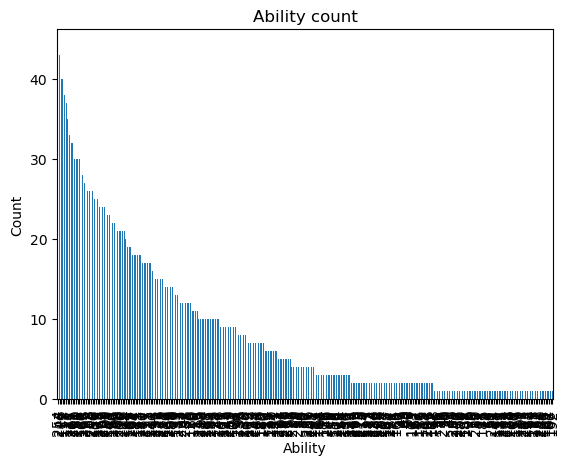

In [152]:
import matplotlib.pyplot as plt

# 根据 count 绘制条形图
plt.figure(figsize=(15, 10)) # 你可以根据需要调整画布的大小
result.plot(kind='bar', legend=False)
plt.xlabel('Ability')
plt.ylabel('Count')
plt.title('Ability count')
plt.show()


In [190]:
df = pd.read_csv(data_folder + "tempdata.csv")
dff = pd.read_csv(data_folder + "ability_description.csv")

In [189]:
df['description'] = df.description.apply(lambda x: )

,Ability,description
0,Telepathy,This Pokemon does not take damage from attacks...
1,Regenerator,"This Pokemon restores 1/3 of its maximum HP, r..."
2,Beast Boost,This Pokemon's highest stat is raised by 1 sta...
3,Levitate,This Pokemon is immune to Ground-type attacks ...
4,Keen Eye,Prevents other Pokemon from lowering this Poke...
5,Sturdy,"If this Pokemon is at full HP, it survives one..."
6,Limber,This Pokemon cannot be paralyzed. Gaining this...
7,Mold Breaker,This Pokemon's moves and their effects ignore ...
8,Battle Bond,"If this Pokemon is a Greninja, its Attack, Spe..."
9,Serene Grace,This Pokemon's moves have their secondary effe...
